In [1]:

# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import math
from sklearn.metrics import mean_absolute_percentage_error
from tqdm import tqdm
import time
import numpy as np
#read the data
df = pd.read_csv("Dasatest.csv",
                infer_datetime_format=True,)

#check the dtypes
# print(df.dtypes)
df['Month'] = pd.to_datetime(df.Month , format = '%d/%m/%Y')
data = df.drop(['Month'], axis=1)
data.index = df.Month
# print(df.head())
cols = data.columns
data = np.array(data)
print(data[:,0].shape)

scaler = MinMaxScaler()
scaler = scaler.fit(data)
data = scaler.transform(data)


 


(72,)


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
raw_seq = data[:,10]
# choose a number of time steps
n_steps_in, n_steps_out = 12, 15
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(30, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(15, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mape')
# fit model
history = model.fit(X, y, epochs=1500, batch_size=12, validation_split=0.2, verbose=1)
# demonstrate prediction
x_input = data[-27:-15,10]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)

Epoch 1/1500
3/3 [==============================] - 1s 113ms/step - loss: 843354.8125 - val_loss: 104.3047
Epoch 2/1500
3/3 [==============================] - 0s 13ms/step - loss: 526676.3750 - val_loss: 103.4755
Epoch 3/1500
3/3 [==============================] - 0s 13ms/step - loss: 330956.3750 - val_loss: 102.8008
Epoch 4/1500
3/3 [==============================] - 0s 11ms/step - loss: 250939.6875 - val_loss: 102.2330
Epoch 5/1500
3/3 [==============================] - 0s 13ms/step - loss: 175302.6250 - val_loss: 101.7951
Epoch 6/1500
3/3 [==============================] - 0s 12ms/step - loss: 143238.4219 - val_loss: 101.4542
Epoch 7/1500
3/3 [==============================] - 0s 11ms/step - loss: 118349.9453 - val_loss: 101.2643
Epoch 8/1500
3/3 [==============================] - 0s 11ms/step - loss: 96933.6953 - val_loss: 101.2418
Epoch 9/1500
3/3 [==============================] - 0s 13ms/step - loss: 76521.9297 - val_loss: 101.2233
Epoch 10/1500
3/3 [============================

Epoch 155/1500
3/3 [==============================] - 0s 10ms/step - loss: 21929.7246 - val_loss: 100.8603
Epoch 156/1500
3/3 [==============================] - 0s 11ms/step - loss: 30191.6875 - val_loss: 100.9238
Epoch 157/1500
3/3 [==============================] - 0s 11ms/step - loss: 31812.0488 - val_loss: 100.9591
Epoch 158/1500
3/3 [==============================] - 0s 11ms/step - loss: 24147.3535 - val_loss: 100.9450
Epoch 159/1500
3/3 [==============================] - 0s 11ms/step - loss: 34016.4609 - val_loss: 100.9609
Epoch 160/1500
3/3 [==============================] - 0s 10ms/step - loss: 26101.4102 - val_loss: 101.0206
Epoch 161/1500
3/3 [==============================] - 0s 11ms/step - loss: 39884.2500 - val_loss: 101.0347
Epoch 162/1500
3/3 [==============================] - 0s 12ms/step - loss: 34617.9531 - val_loss: 100.9646
Epoch 163/1500
3/3 [==============================] - 0s 12ms/step - loss: 23581.2852 - val_loss: 100.9089
Epoch 164/1500
3/3 [=================

3/3 [==============================] - 0s 11ms/step - loss: 24090.6484 - val_loss: 100.8909
Epoch 308/1500
3/3 [==============================] - 0s 10ms/step - loss: 23382.7715 - val_loss: 100.8912
Epoch 309/1500
3/3 [==============================] - 0s 12ms/step - loss: 27330.8926 - val_loss: 100.8627
Epoch 310/1500
3/3 [==============================] - 0s 10ms/step - loss: 21652.9785 - val_loss: 100.8690
Epoch 311/1500
3/3 [==============================] - 0s 11ms/step - loss: 18519.0312 - val_loss: 100.8265
Epoch 312/1500
3/3 [==============================] - 0s 13ms/step - loss: 15342.9082 - val_loss: 100.7459
Epoch 313/1500
3/3 [==============================] - 0s 14ms/step - loss: 18921.7773 - val_loss: 100.7624
Epoch 314/1500
3/3 [==============================] - 0s 11ms/step - loss: 23258.5703 - val_loss: 100.8452
Epoch 315/1500
3/3 [==============================] - 0s 11ms/step - loss: 29953.5703 - val_loss: 100.8598
Epoch 316/1500
3/3 [==============================] 

3/3 [==============================] - 0s 10ms/step - loss: 20524.7578 - val_loss: 100.6677
Epoch 460/1500
3/3 [==============================] - 0s 10ms/step - loss: 16897.4141 - val_loss: 100.7904
Epoch 461/1500
3/3 [==============================] - 0s 11ms/step - loss: 18132.6211 - val_loss: 100.8126
Epoch 462/1500
3/3 [==============================] - 0s 10ms/step - loss: 15493.4619 - val_loss: 100.7664
Epoch 463/1500
3/3 [==============================] - 0s 11ms/step - loss: 17385.4551 - val_loss: 100.6875
Epoch 464/1500
3/3 [==============================] - 0s 11ms/step - loss: 26317.3848 - val_loss: 100.6725
Epoch 465/1500
3/3 [==============================] - 0s 13ms/step - loss: 29295.6113 - val_loss: 100.7022
Epoch 466/1500
3/3 [==============================] - 0s 11ms/step - loss: 23667.2559 - val_loss: 100.7322
Epoch 467/1500
3/3 [==============================] - 0s 13ms/step - loss: 16890.9902 - val_loss: 100.7764
Epoch 468/1500
3/3 [==============================] 

3/3 [==============================] - 0s 11ms/step - loss: 14906.9756 - val_loss: 100.5677
Epoch 612/1500
3/3 [==============================] - 0s 11ms/step - loss: 14819.2725 - val_loss: 100.5377
Epoch 613/1500
3/3 [==============================] - 0s 12ms/step - loss: 13885.9707 - val_loss: 100.5186
Epoch 614/1500
3/3 [==============================] - 0s 11ms/step - loss: 13189.6895 - val_loss: 100.5271
Epoch 615/1500
3/3 [==============================] - 0s 11ms/step - loss: 13310.9570 - val_loss: 100.5426
Epoch 616/1500
3/3 [==============================] - 0s 10ms/step - loss: 14340.6455 - val_loss: 100.5629
Epoch 617/1500
3/3 [==============================] - 0s 11ms/step - loss: 11357.0488 - val_loss: 100.5544
Epoch 618/1500
3/3 [==============================] - 0s 16ms/step - loss: 14847.3818 - val_loss: 100.5443
Epoch 619/1500
3/3 [==============================] - 0s 17ms/step - loss: 12035.5693 - val_loss: 100.5312
Epoch 620/1500
3/3 [==============================] 

Epoch 764/1500
3/3 [==============================] - 0s 10ms/step - loss: 10019.8574 - val_loss: 100.3385
Epoch 765/1500
3/3 [==============================] - 0s 11ms/step - loss: 8315.7031 - val_loss: 100.3382
Epoch 766/1500
3/3 [==============================] - 0s 10ms/step - loss: 7964.0488 - val_loss: 100.3567
Epoch 767/1500
3/3 [==============================] - 0s 11ms/step - loss: 11028.3066 - val_loss: 100.3735
Epoch 768/1500
3/3 [==============================] - 0s 11ms/step - loss: 11109.5088 - val_loss: 100.3867
Epoch 769/1500
3/3 [==============================] - 0s 11ms/step - loss: 12823.9482 - val_loss: 100.3621
Epoch 770/1500
3/3 [==============================] - 0s 12ms/step - loss: 11437.3779 - val_loss: 100.3445
Epoch 771/1500
3/3 [==============================] - 0s 15ms/step - loss: 11223.0654 - val_loss: 100.3399
Epoch 772/1500
3/3 [==============================] - 0s 13ms/step - loss: 7461.0088 - val_loss: 100.3333
Epoch 773/1500
3/3 [====================

Epoch 917/1500
3/3 [==============================] - 0s 10ms/step - loss: 11715.2881 - val_loss: 100.3145
Epoch 918/1500
3/3 [==============================] - 0s 10ms/step - loss: 14040.9639 - val_loss: 100.3303
Epoch 919/1500
3/3 [==============================] - 0s 10ms/step - loss: 12559.9180 - val_loss: 100.3678
Epoch 920/1500
3/3 [==============================] - 0s 10ms/step - loss: 10406.8389 - val_loss: 100.3690
Epoch 921/1500
3/3 [==============================] - 0s 10ms/step - loss: 9588.4678 - val_loss: 100.3617
Epoch 922/1500
3/3 [==============================] - 0s 11ms/step - loss: 13580.6875 - val_loss: 100.3350
Epoch 923/1500
3/3 [==============================] - 0s 11ms/step - loss: 11356.3662 - val_loss: 100.3179
Epoch 924/1500
3/3 [==============================] - 0s 14ms/step - loss: 14933.3477 - val_loss: 100.2961
Epoch 925/1500
3/3 [==============================] - 0s 11ms/step - loss: 16788.0859 - val_loss: 100.3213
Epoch 926/1500
3/3 [==================

3/3 [==============================] - 0s 10ms/step - loss: 10869.7461 - val_loss: 100.3760
Epoch 1070/1500
3/3 [==============================] - 0s 10ms/step - loss: 11419.6172 - val_loss: 100.3548
Epoch 1071/1500
3/3 [==============================] - 0s 11ms/step - loss: 12150.4766 - val_loss: 100.3207
Epoch 1072/1500
3/3 [==============================] - 0s 10ms/step - loss: 13569.3730 - val_loss: 100.3234
Epoch 1073/1500
3/3 [==============================] - 0s 11ms/step - loss: 13931.2139 - val_loss: 100.3149
Epoch 1074/1500
3/3 [==============================] - 0s 11ms/step - loss: 10929.4883 - val_loss: 100.2966
Epoch 1075/1500
3/3 [==============================] - 0s 12ms/step - loss: 9504.6406 - val_loss: 100.3230
Epoch 1076/1500
3/3 [==============================] - 0s 16ms/step - loss: 12859.5020 - val_loss: 100.3728
Epoch 1077/1500
3/3 [==============================] - 0s 11ms/step - loss: 10562.0273 - val_loss: 100.3878
Epoch 1078/1500
3/3 [========================

3/3 [==============================] - 0s 12ms/step - loss: 11226.8711 - val_loss: 100.3762
Epoch 1146/1500
3/3 [==============================] - 0s 12ms/step - loss: 21131.9160 - val_loss: 100.3851
Epoch 1147/1500
3/3 [==============================] - 0s 10ms/step - loss: 22808.8203 - val_loss: 100.3933
Epoch 1148/1500
3/3 [==============================] - 0s 11ms/step - loss: 16178.9424 - val_loss: 100.3751
Epoch 1149/1500
3/3 [==============================] - 0s 10ms/step - loss: 11105.2227 - val_loss: 100.3279
Epoch 1150/1500
3/3 [==============================] - 0s 11ms/step - loss: 11886.2744 - val_loss: 100.3004
Epoch 1151/1500
3/3 [==============================] - 0s 13ms/step - loss: 15920.0381 - val_loss: 100.3056
Epoch 1152/1500
3/3 [==============================] - 0s 11ms/step - loss: 12385.9590 - val_loss: 100.3282
Epoch 1153/1500
3/3 [==============================] - 0s 10ms/step - loss: 9088.2275 - val_loss: 100.3552
Epoch 1154/1500
3/3 [========================

3/3 [==============================] - 0s 10ms/step - loss: 11612.6592 - val_loss: 100.3527
Epoch 1222/1500
3/3 [==============================] - 0s 11ms/step - loss: 14028.5391 - val_loss: 100.3522
Epoch 1223/1500
3/3 [==============================] - 0s 10ms/step - loss: 12413.1074 - val_loss: 100.3159
Epoch 1224/1500
3/3 [==============================] - 0s 10ms/step - loss: 10180.7549 - val_loss: 100.2952
Epoch 1225/1500
3/3 [==============================] - 0s 11ms/step - loss: 14016.6055 - val_loss: 100.3081
Epoch 1226/1500
3/3 [==============================] - 0s 10ms/step - loss: 12201.6582 - val_loss: 100.3151
Epoch 1227/1500
3/3 [==============================] - 0s 11ms/step - loss: 8462.1416 - val_loss: 100.3304
Epoch 1228/1500
3/3 [==============================] - 0s 10ms/step - loss: 8747.4131 - val_loss: 100.3316
Epoch 1229/1500
3/3 [==============================] - 0s 12ms/step - loss: 12455.4131 - val_loss: 100.3444
Epoch 1230/1500
3/3 [=========================

3/3 [==============================] - 0s 10ms/step - loss: 13539.0332 - val_loss: 100.3531
Epoch 1374/1500
3/3 [==============================] - 0s 11ms/step - loss: 9231.1748 - val_loss: 100.3233
Epoch 1375/1500
3/3 [==============================] - 0s 11ms/step - loss: 14155.6992 - val_loss: 100.3165
Epoch 1376/1500
3/3 [==============================] - 0s 10ms/step - loss: 12693.9131 - val_loss: 100.3338
Epoch 1377/1500
3/3 [==============================] - 0s 11ms/step - loss: 8121.1338 - val_loss: 100.3342
Epoch 1378/1500
3/3 [==============================] - 0s 11ms/step - loss: 7131.9277 - val_loss: 100.3573
Epoch 1379/1500
3/3 [==============================] - 0s 13ms/step - loss: 9677.3887 - val_loss: 100.3570
Epoch 1380/1500
3/3 [==============================] - 0s 11ms/step - loss: 8153.1919 - val_loss: 100.3627
Epoch 1381/1500
3/3 [==============================] - 0s 10ms/step - loss: 11736.1123 - val_loss: 100.3344
Epoch 1382/1500
3/3 [============================

3/3 [==============================] - 0s 10ms/step - loss: 9412.0732 - val_loss: 100.3084
Epoch 1450/1500
3/3 [==============================] - 0s 10ms/step - loss: 15912.6670 - val_loss: 100.2859
Epoch 1451/1500
3/3 [==============================] - 0s 10ms/step - loss: 15530.7930 - val_loss: 100.2997
Epoch 1452/1500
3/3 [==============================] - 0s 10ms/step - loss: 14876.3398 - val_loss: 100.3386
Epoch 1453/1500
3/3 [==============================] - 0s 10ms/step - loss: 13753.9053 - val_loss: 100.3895
Epoch 1454/1500
3/3 [==============================] - 0s 11ms/step - loss: 11841.7070 - val_loss: 100.3710
Epoch 1455/1500
3/3 [==============================] - 0s 10ms/step - loss: 10877.5566 - val_loss: 100.3281
Epoch 1456/1500
3/3 [==============================] - 0s 11ms/step - loss: 12630.5156 - val_loss: 100.3086
Epoch 1457/1500
3/3 [==============================] - 0s 12ms/step - loss: 13604.2383 - val_loss: 100.2921
Epoch 1458/1500
3/3 [========================

(1, 15)


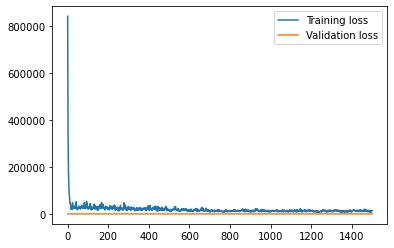

In [3]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
print(yhat.shape)

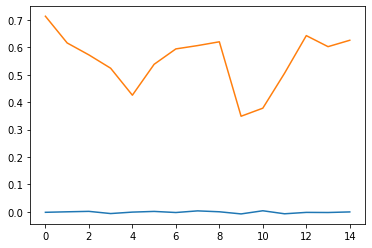

In [4]:
plt.plot(yhat[0,:])
plt.plot(data[-15:,10])

In [5]:
mape = mean_absolute_percentage_error(yhat[0,:],data[-15:,10])
mape

849.8133181878445